In [121]:
#Data Processing
import numpy as np
import pandas as pd

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#notebook cleanup
import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [122]:
#Pre COVID-19 datasets
pre_pri = pd.read_excel("data/pre_pri.xlsx", index_col = 0)
pre_sec = pd.read_excel("data/pre_sec.xlsx", index_col = 0)
pre_total = pd.read_excel("data/pre_total.xlsx", index_col = 0)
pre_home_alone = pd.read_excel("data/pre_home_alone.xlsx", index_col = 0)

#During COVID-19 datasets
dur_pri = pd.read_excel("data/dur_pri.xlsx", index_col = 0)
dur_sec = pd.read_excel("data/dur_sec.xlsx", index_col = 0)
dur_total = pd.read_excel("data/dur_total.xlsx", index_col = 0)
dur_home_alone = pd.read_excel("data/dur_home_alone.xlsx", index_col = 0)

#Pre COVID-19 morning/afternoon/evening datasets
pre_pri_morn = pd.read_excel("data/pre_pri_morn.xlsx", index_col = 0)
pre_pri_aft = pd.read_excel("data/pre_pri_aft.xlsx", index_col = 0)
pre_pri_eve = pd.read_excel("data/pre_pri_eve.xlsx", index_col = 0)

#During COVID-19 morning/afternoon/evening datasets
dur_pri_morn = pd.read_excel("data/dur_pri_morn.xlsx", index_col = 0)
dur_pri_aft = pd.read_excel("data/dur_pri_aft.xlsx", index_col = 0)
dur_pri_eve = pd.read_excel("data/dur_pri_eve.xlsx", index_col = 0)

In [123]:
#Create DataFrames combining Pre and During
df_pri = pre_pri.append(dur_pri)
df_sec = pre_sec.append(dur_sec)
df_total = pre_total.append(dur_total)
df_home_alone = pre_home_alone.append(dur_home_alone)

In [124]:
pre_pri_ = pre_pri.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])
pre_sec_ = pre_sec.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])
pre_total_ = pre_total.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])
pre_home_alone_ = pre_home_alone.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])

# Data Visualisation

In [125]:
#Function to convert decimals into hours and minutes (HH:MM)
def convert(time):
    hours = int(time)
    minutes = (time*60) % 60
    return "%d:%02d" % (hours, minutes)

In [126]:
#Function to automatically label a bar graph with their respective amount of time in hours and minutes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(convert(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

### Primary and Secondary Activities

(0.0, 8.7)

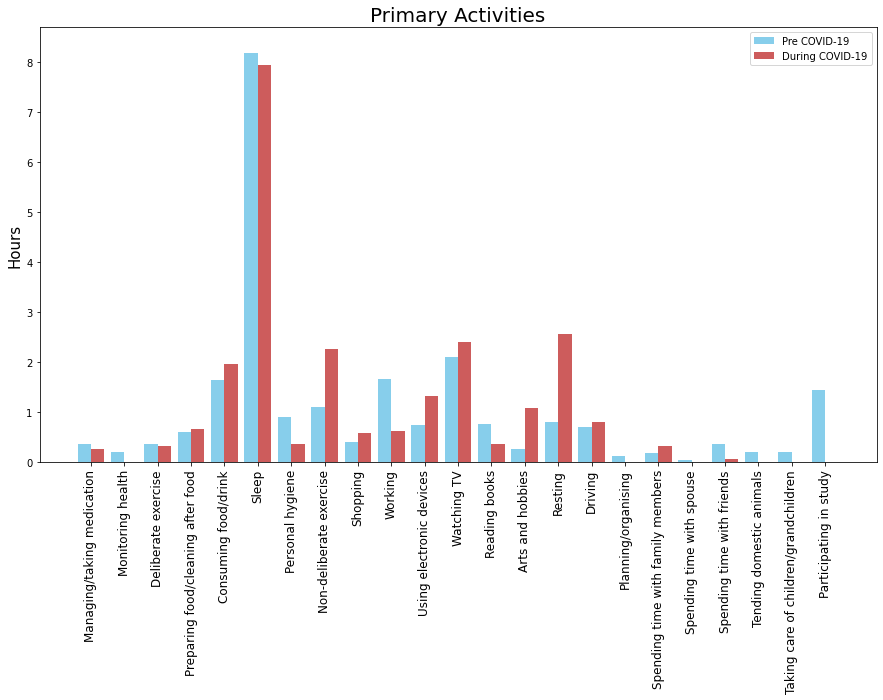

In [127]:
#Means of Primary Activities plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

prepri = ax.bar(x, pre_pri.mean()[:-1], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
durpri = ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Primary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.7)

(0.0, 8.7)

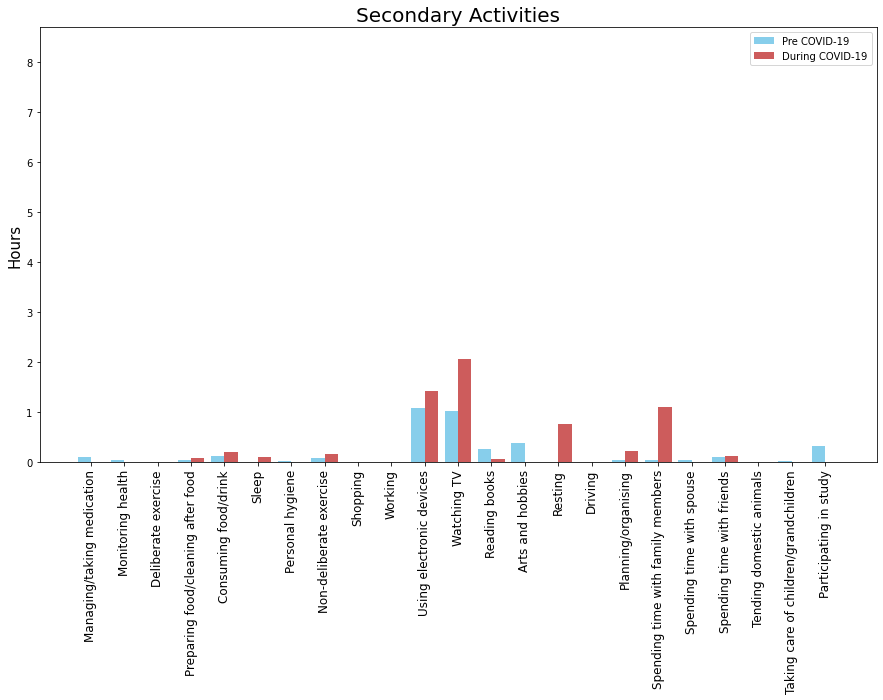

In [128]:
#Means of Secondary Activities plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

presec = ax.bar(x, pre_sec.mean()[:-1], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
dursec = ax.bar(x+bar_width, dur_sec.mean()[:-1], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Secondary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.7)

(0.0, 8.7)

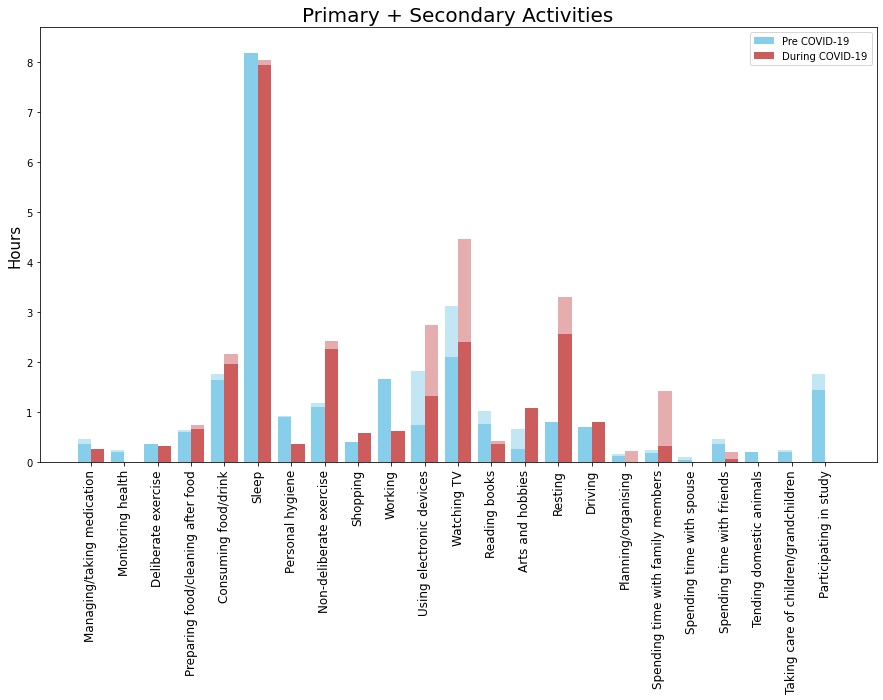

In [129]:
#Means of Total Activities plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

pretot = ax.bar(x, pre_total.mean()[:-1], width=bar_width, color = 'SkyBlue', alpha = 0.5)
durtot = ax.bar(x+bar_width, dur_total.mean()[:-1], width=bar_width, color = 'IndianRed', alpha = 0.5)

prepri = ax.bar(x, pre_pri.mean()[:-1], width=bar_width, color = 'SkyBlue', 
                label='Pre COVID-19')
durpri = ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, color = 'IndianRed', 
                label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Primary + Secondary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.7)

### Activity Counts (n=26 Pre vs n=15 During)

In [130]:
df = {'No. of people participating in activity Pre COVID (n=26)':pre_pri[pre_pri[pre_pri.columns[1:-1]]>0].count().values[1:-1], 
      'No. of people participating in activity During COVID (n=15)':dur_pri[dur_pri[dur_pri.columns[1:-1]]>0].count().values[1:-1], 
      '% of people participating in activity Pre COVID':np.round(pre_pri[pre_pri[pre_pri.columns[1:-1]]>0].count().values/26*100, 2)[1:-1], 
      '% of people participating in activity During COVID':np.round(dur_pri[dur_pri[dur_pri.columns[1:-1]]>0].count().values/15*100, 2)[1:-1], 
      'Proportion Changes':np.round((dur_pri[dur_pri[dur_pri.columns[1:-1]]>0].count().values/15*100-pre_pri[pre_pri[pre_pri.columns[1:-1]]>0].count().values/26*100)/(pre_pri[pre_pri[pre_pri.columns[1:-1]]>0].count().values/26*100), 2)[1:-1]}
activity_counts = pd.DataFrame(data=df, index=pre_pri.columns[1:-1])
activity_counts

,No. of people participating in activity Pre COVID (n=26),No. of people participating in activity During COVID (n=15),% of people participating in activity Pre COVID,% of people participating in activity During COVID,Proportion Changes
Managing/taking medication,17,5,65.38,33.33,-0.49
Monitoring health,9,0,34.62,0.00,-1.00
Deliberate exercise,11,3,42.31,20.00,-0.53
Preparing food/cleaning after food,21,9,80.77,60.00,-0.26
Consuming food/drink,25,15,96.15,100.00,0.04
Sleep,26,15,100.00,100.00,0.00
Personal hygiene,25,11,96.15,73.33,-0.24
Non-deliberate exercise,22,11,84.62,73.33,-0.13
Shopping,14,4,53.85,26.67,-0.50
Working,9,1,34.62,6.67,-0.81


### Largest proportion decreases of patients participating in activities:
#### 1 - 5:

In [131]:
print(activity_counts[activity_counts.columns[4]].sort_values()[:5])

Monitoring health                       -1.0
Taking care of children/grandchildren   -1.0
Tending domestic animals                -1.0
Spending time with spouse               -1.0
Planning/organising                     -1.0
Name: Proportion Changes, dtype: float64


The top 5 proportion decreases are all activities where there was at least one patient participating before COVID-19, whereas there are no patients participating in that activity during COVID-19. The most surprising of these activities being **Monitoring health**. 

#### 5 - 10:

In [132]:
print(activity_counts[activity_counts.columns[4]].sort_values()[5:10])

Participating in study       -0.93
Missing                      -0.86
Working                      -0.81
Spending time with friends   -0.71
Deliberate exercise          -0.53
Name: Proportion Changes, dtype: float64


The next 5 largest proportion decreases are not surprising. 

**Participating in study** is a very high proportion difference since the during COVID-19 data was collected using a different method to the pre COVID-19 data, which involved a phone call after the day the data was recorded, so very few patients actually recorded time "participating in the study" for the during COVID-19 dataset.

**Missing** can be disregarded.

**Working, Spending time with friends** and **Deliberate exercise** are not surprising large differences since these activities most likely involve leaving the house and interacting with other people, both of which are risky activities during this pandemic. 

#### 10 - 15:

In [133]:
print(activity_counts[activity_counts.columns[4]].sort_values()[10:15])

Shopping                     -0.50
Reading books                -0.50
Managing/taking medication   -0.49
Driving                      -0.45
Arts and hobbies             -0.42
Name: Proportion Changes, dtype: float64


Surprisingly, there are 50% less people **Managing/taking medication** and **Reading books**, while there are 42% less people doing **Arts and hobbies**. 

#### 15 - 21:

In [134]:
print(activity_counts[activity_counts.columns[4]].sort_values()[15:21])

Preparing food/cleaning after food   -0.26
Watching TV                          -0.25
Personal hygiene                     -0.24
Non-deliberate exercise              -0.13
Using electronic devices             -0.13
Sleep                                 0.00
Name: Proportion Changes, dtype: float64


The rest of the proportion decreases are not very large differences.

### Largest proportion increases of patients participating in activities:

In [135]:
print(abs(activity_counts[activity_counts.columns[4]].sort_values(ascending=False)[:3]))

Resting                              0.52
Spending time with family members    0.24
Consuming food/drink                 0.04
Name: Proportion Changes, dtype: float64


There are only three activities in which the proportion of patients participating in that activity has increased during COVID-19. The only real difference being **Resting** where there are 52% more people doing this activity.

Now these proportion changes may be invalid since there is quite a large difference in sample sizes, so we will see the proportion changes in just the 15 patients who recorded data for both Pre and During COVID. 

### Activity Counts (n=15 Pre vs n=15 During)

In [136]:
dg = {'No. of people participating in activity Pre COVID (n=15)':pre_pri_[pre_pri_[pre_pri_.columns[1:-1]]>0].count().values[1:-1], 
      'No. of people participating in activity During COVID (n=15)':dur_pri[dur_pri[dur_pri.columns[1:-1]]>0].count().values[1:-1], 
      '% of people participating in activity Pre COVID':np.round(pre_pri_[pre_pri_[pre_pri_.columns[1:-1]]>0].count().values/15*100, 2)[1:-1], 
      '% of people participating in activity During COVID':np.round(dur_pri[dur_pri[dur_pri.columns[1:-1]]>0].count().values/15*100, 2)[1:-1], 
      'Proportion Changes':np.round((dur_pri[dur_pri[dur_pri.columns[1:-1]]>0].count().values-pre_pri_[pre_pri_[pre_pri_.columns[1:-1]]>0].count().values)/(pre_pri_[pre_pri_[pre_pri_.columns[1:-1]]>0].count().values), 2)[1:-1]}
activity_counts_ = pd.DataFrame(data=dg, index=pre_pri.columns[1:-1])
activity_counts_

,No. of people participating in activity Pre COVID (n=15),No. of people participating in activity During COVID (n=15),% of people participating in activity Pre COVID,% of people participating in activity During COVID,Proportion Changes
Managing/taking medication,9,5,60.00,33.33,-0.44
Monitoring health,3,0,20.00,0.00,-1.00
Deliberate exercise,7,3,46.67,20.00,-0.57
Preparing food/cleaning after food,12,9,80.00,60.00,-0.25
Consuming food/drink,14,15,93.33,100.00,0.07
Sleep,15,15,100.00,100.00,0.00
Personal hygiene,14,11,93.33,73.33,-0.21
Non-deliberate exercise,12,11,80.00,73.33,-0.08
Shopping,9,4,60.00,26.67,-0.56
Working,6,1,40.00,6.67,-0.83


Now that we have the proportion changes which compare only the patients who recorded data for both Pre and During COVID (n=15), let's compare these results with the previous results to see if there are any big changes. 

In [137]:
print(abs(activity_counts_[activity_counts_.columns[4]] - activity_counts[activity_counts.columns[4]]).sort_values(ascending=False))

Spending time with family members        0.43
Resting                                  0.12
Arts and hobbies                         0.09
Watching TV                              0.08
Reading books                            0.07
Shopping                                 0.06
Missing                                  0.06
Non-deliberate exercise                  0.05
Managing/taking medication               0.05
Spending time with friends               0.04
Deliberate exercise                      0.04
Consuming food/drink                     0.03
Personal hygiene                         0.03
Working                                  0.02
Preparing food/cleaning after food       0.01
Using electronic devices                 0.01
Sleep                                    0.00
Monitoring health                        0.00
Planning/organising                      0.00
Driving                                  0.00
Participating in study                   0.00
Tending domestic animals          

The only noticeable change is with **Spending time with family members** and possibly **Resting**. 

Looking deeper into the numbers for spending time with family members. We can see in the Pre COVID data, 7/26 participated, but looking at only n=15, we have 3/15 patients participating. The difference is very small so we can disregard the large change in proportion difference when looking at 26 patients vs 15 patients. 

From this, it is safe to say that the proportion changes in the first table (26 Pre vs 15 During patients) shows accurate results. 

### Column groupings

#### Grouping Method 2:

In [138]:
#Grouping columns
pre_g2_1 = pre_pri[pre_pri.columns[[1, 2]]].sum(axis=1)
pre_g2_2 = pre_pri[pre_pri.columns[[3, 8]]].sum(axis=1)
pre_g2_3 = pre_pri[pre_pri.columns[[1, 2, 8, 3]]].sum(axis=1)
pre_g2_4 = pre_pri[pre_pri.columns[[7, 6, 15, 1, 2, 3]]].sum(axis=1)
pre_g2_5 = pre_pri[pre_pri.columns[[4, 5]]].sum(axis=1)
pre_g2_6 = pre_pri[pre_pri.columns[[18, 19, 20, 21, 22]]].sum(axis=1)
pre_g2_7 = pre_pri[pre_pri.columns[[13, 14]]].sum(axis=1)
pre_g2_8 = pre_pri[pre_pri.columns[[12, 11]]].sum(axis=1)
pre_g2_9 = pre_pri[pre_pri.columns[[4, 8, 21, 17]]].sum(axis=1)
pre_g2_10 = pre_pri[pre_pri.columns[[16, 9]]].sum(axis=1)

dur_g2_1 = dur_pri[dur_pri.columns[[1, 2]]].sum(axis=1)
dur_g2_2 = dur_pri[dur_pri.columns[[3, 8]]].sum(axis=1)
dur_g2_3 = dur_pri[dur_pri.columns[[1, 2, 8, 3]]].sum(axis=1)
dur_g2_4 = dur_pri[dur_pri.columns[[7, 6, 15, 1, 2, 3]]].sum(axis=1)
dur_g2_5 = dur_pri[dur_pri.columns[[4, 5]]].sum(axis=1)
dur_g2_6 = dur_pri[dur_pri.columns[[18, 19, 20, 21, 22]]].sum(axis=1)
dur_g2_7 = dur_pri[dur_pri.columns[[13, 14]]].sum(axis=1)
dur_g2_8 = dur_pri[dur_pri.columns[[12, 11]]].sum(axis=1)
dur_g2_9 = dur_pri[dur_pri.columns[[4, 8, 21, 17]]].sum(axis=1)
dur_g2_10 = dur_pri[dur_pri.columns[[16, 9]]].sum(axis=1)

In [139]:
#Converting back to DataFrames
p2 = {'Health and Medication':pre_g2_1.values, 'Exercise':pre_g2_2.values, 'Health, Medication or Exercise':pre_g2_3.values, 
    'Self-Care':pre_g2_4.values, 'Food-Related':pre_g2_5.values, 'Time with People or Animals':pre_g2_6.values, 
    'Hobbies':pre_g2_7.values, 'Digital':pre_g2_8.values, 'Housebound Chores':pre_g2_9.values, 
    'Non-Housebound Chores':pre_g2_10.values}
pre_g2 = pd.DataFrame(data=p2, index=pre_g2_1.index)

d2 = {'Health and Medication':dur_g2_1.values, 'Exercise':dur_g2_2.values, 'Health, Medication or Exercise':dur_g2_3.values, 
    'Self-Care':dur_g2_4.values, 'Food-Related':dur_g2_5.values, 'Time with People or Animals':dur_g2_6.values, 
    'Hobbies':dur_g2_7.values, 'Digital':dur_g2_8.values, 'Housebound Chores':dur_g2_9.values, 
    'Non-Housebound Chores':dur_g2_10.values}
dur_g2 = pd.DataFrame(data=d2, index=dur_g2_1.index)

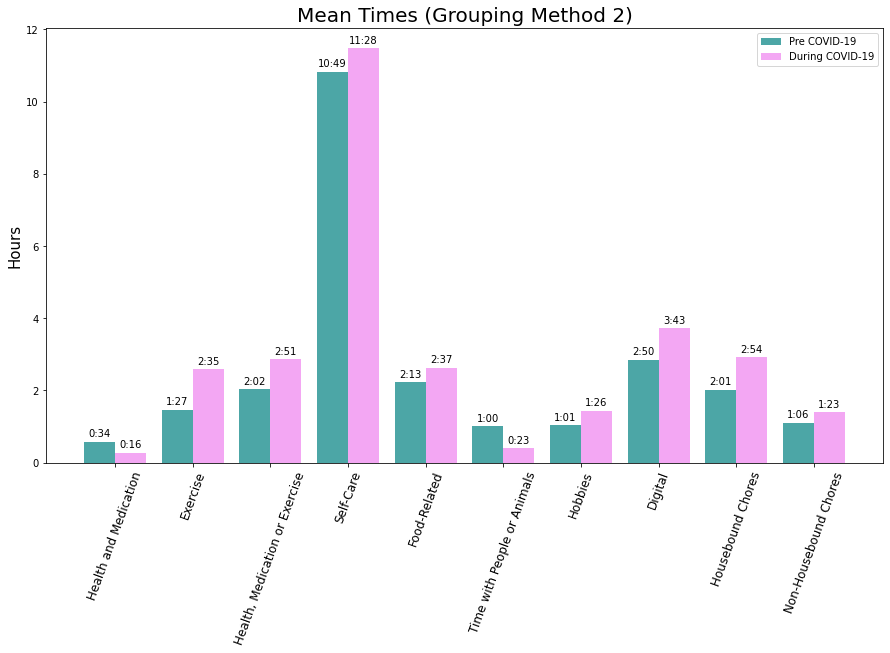

In [140]:
#Grouping method 2 plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(len(pre_g2.mean().values))
bar_width = 0.4

pre2 = ax.bar(x, pre_g2.mean(), width=bar_width, color = 'teal', label='Pre COVID-19', alpha=0.7)
dur2 = ax.bar(x+bar_width, dur_g2.mean(), width=bar_width, color = 'violet', label='During COVID-19', alpha=0.7)

autolabel(pre2)
autolabel(dur2)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_g2.columns, rotation=70, size=12)
ax.set_title('Mean Times (Grouping Method 2)', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

#### Grouping Method 3:

In [141]:
#Grouping Columns
pre_g3_1 = pre_pri[pre_pri.columns[[1, 2, 5, 6, 7, 15]]].sum(axis=1)
pre_g3_2 = pre_pri[pre_pri.columns[[4, 8, 9, 10, 17, 21, 22]]].sum(axis=1)
pre_g3_3 = pre_pri[pre_pri.columns[[3, 11, 12, 13, 14, 18, 19, 20]]].sum(axis=1)
pre_g3_4 = pre_pri[pre_pri.columns[[16, 23, 24]]].sum(axis=1)

dur_g3_1 = dur_pri[dur_pri.columns[[1, 2, 5, 6, 7, 15]]].sum(axis=1)
dur_g3_2 = dur_pri[dur_pri.columns[[4, 8, 9, 10, 17, 21, 22]]].sum(axis=1)
dur_g3_3 = dur_pri[dur_pri.columns[[3, 11, 12, 13, 14, 18, 19, 20]]].sum(axis=1)
dur_g3_4 = dur_pri[dur_pri.columns[[16, 23, 24]]].sum(axis=1)

pre_g3_1_ = pre_pri_[pre_pri_.columns[[1, 2, 5, 6, 7, 15]]].sum(axis=1)
pre_g3_2_ = pre_pri_[pre_pri_.columns[[4, 8, 9, 10, 17, 21, 22]]].sum(axis=1)
pre_g3_3_ = pre_pri_[pre_pri_.columns[[3, 11, 12, 13, 14, 18, 19, 20]]].sum(axis=1)
pre_g3_4_ = pre_pri_[pre_pri_.columns[[16, 23, 24]]].sum(axis=1)

In [142]:
#Converting back to DataFrames
p3 = {'Reproductive Time':pre_g3_1.values, 'Productive Time':pre_g3_2.values, 
     'Recreative Time':pre_g3_3.values, 'Connection Time':pre_g3_4.values}
pre_g3 = pd.DataFrame(data=p3, index=pre_g3_1.index)

d3 = {'Reproductive Time':dur_g3_1.values, 'Productive Time':dur_g3_2.values, 
     'Recreative Time':dur_g3_3.values, 'Connection Time':dur_g3_4.values}
dur_g3 = pd.DataFrame(data=d3, index=dur_g3_1.index)

p3_ = {'Reproductive Time':pre_g3_1_.values, 'Productive Time':pre_g3_2_.values, 
     'Recreative Time':pre_g3_3_.values, 'Connection Time':pre_g3_4_.values}
pre_g3_ = pd.DataFrame(data=p3_, index=pre_g3_1_.index)

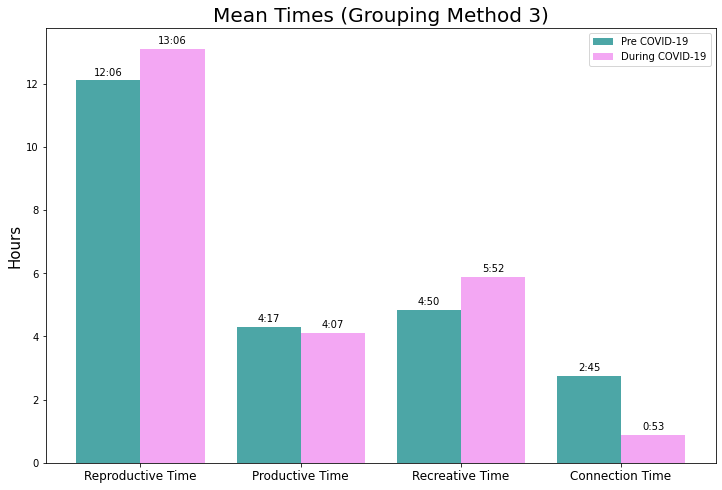

In [143]:
#Grouping method 3 plot
fig, ax = plt.subplots(figsize=(12, 8))
x=np.arange(len(pre_g3.mean().values))
bar_width = 0.4

pre3 = ax.bar(x, pre_g3.mean(), width=bar_width, color = 'teal', label='Pre COVID-19', alpha=0.7)
dur3 = ax.bar(x+bar_width, dur_g3.mean(), width=bar_width, color = 'violet', label='During COVID-19', alpha=0.7)

autolabel(pre3)
autolabel(dur3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_g3.columns, size=12)
ax.set_title('Mean Times (Grouping Method 3)', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

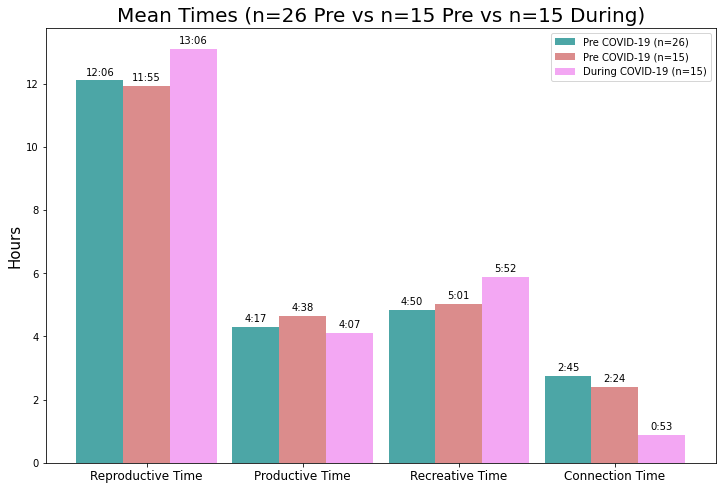

In [144]:
#Grouping method 3 plot (2)
fig, ax = plt.subplots(figsize=(12, 8))
x=np.arange(len(pre_g3.mean().values))
bar_width = 0.3

pre3 = ax.bar(x, pre_g3.mean(), width=bar_width, color = 'teal', label='Pre COVID-19 (n=26)', alpha=0.7)
prev = ax.bar(x+bar_width, pre_g3_.mean(), width=bar_width, color = 'indianred', label='Pre COVID-19 (n=15)', alpha=0.7)
dur3 = ax.bar(x+2*bar_width, dur_g3.mean(), width=bar_width, color = 'violet', label='During COVID-19 (n=15)', alpha=0.7)

autolabel(pre3)
autolabel(prev)
autolabel(dur3)

ax.set_xticks(x+bar_width)
ax.set_xticklabels(pre_g3.columns, size=12)
ax.set_title('Mean Times (n=26 Pre vs n=15 Pre vs n=15 During)', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

In [145]:
#Sorting by descending order of 'Reproductive Time'
_p1 = pre_g3_1.sort_values(ascending=False)
_p2 = pre_g3_2.reindex(_p1.index)
_p3 = pre_g3_3.reindex(_p1.index)
_p4 = pre_g3_4.reindex(_p1.index)

_d1 = dur_g3_1.sort_values(ascending=False)
_d2 = dur_g3_2.reindex(_d1.index)
_d3 = dur_g3_3.reindex(_d1.index)
_d4 = dur_g3_4.reindex(_d1.index)

#Converting to numpy arrays to display on stacked bar chart
p1 = np.array(_p1)
p2 = np.array(_p2)
p3 = np.array(_p3)
p4 = np.array(_p4)

d1 = np.array(_d1)
d2 = np.array(_d2)
d3 = np.array(_d3)
d4 = np.array(_d4)

(0.0, 25.0)

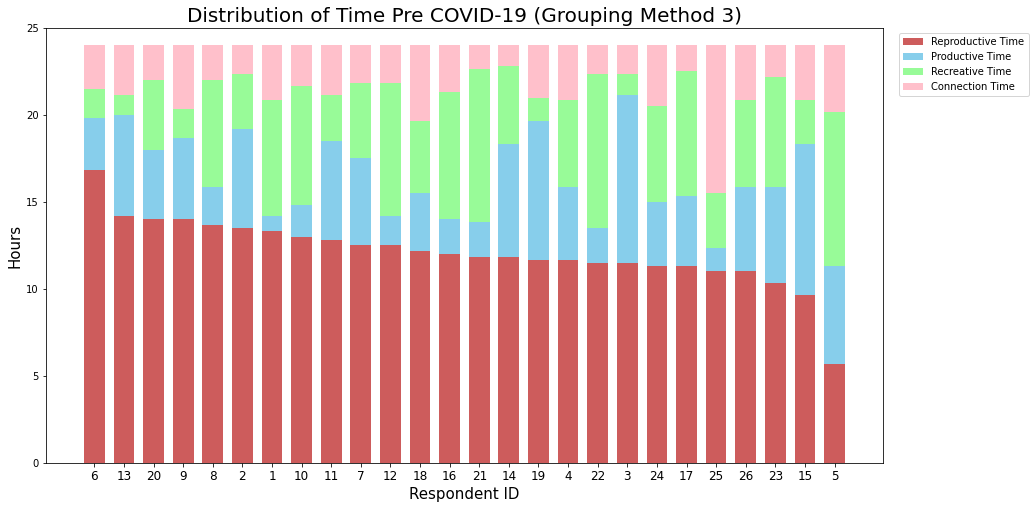

In [146]:
#Grouping method 3 plot Pre
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(p1))
width=0.7

plot1 = ax.bar(x, p1, width, color='indianred', label='Reproductive Time')
plot2 = ax.bar(x, p2, width, bottom=p1, color='skyblue', label='Productive Time')
plot3 = ax.bar(x, p3, width, bottom=p1+p2, color='palegreen', label='Recreative Time')
plot4 = ax.bar(x, p4, width, bottom=p1+p2+p3, color='pink', label='Connection Time')

ax.set_xticks(x)
ax.set_xticklabels(_p1.index, size=12)
ax.set_title('Distribution of Time Pre COVID-19 (Grouping Method 3)', size=20)
ax.set_ylabel('Hours', size=15)
ax.set_xlabel('Respondent ID', size=15)
ax.legend(loc=1, bbox_to_anchor=(1.18, 1))
plt.ylim(0, 25)

(0.0, 25.0)

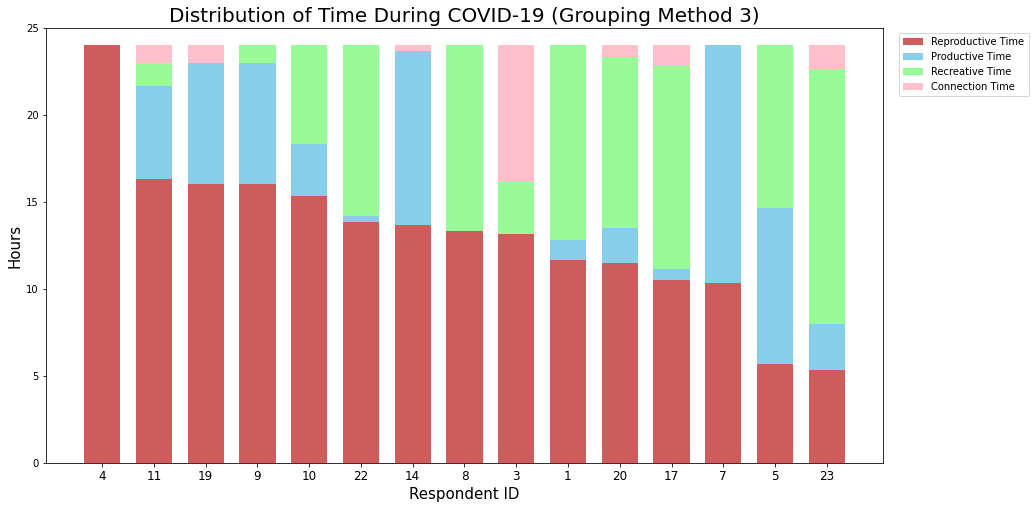

In [147]:
#Grouping method 3 plot During
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(d1))
width=0.7

plot1 = ax.bar(x, d1, width, color='indianred', label='Reproductive Time')
plot2 = ax.bar(x, d2, width, bottom=d1, color='skyblue', label='Productive Time')
plot3 = ax.bar(x, d3, width, bottom=d1+d2, color='palegreen', label='Recreative Time')
plot4 = ax.bar(x, d4, width, bottom=d1+d2+d3, color='pink', label='Connection Time')

ax.set_xticks(x)
ax.set_xticklabels(_d1.index, size=12)
ax.set_title('Distribution of Time During COVID-19 (Grouping Method 3)', size=20)
ax.set_ylabel('Hours', size=15)
ax.set_xlabel('Respondent ID', size=15)
ax.legend(loc=1, bbox_to_anchor=(1.18, 1))
plt.ylim(0, 25)

### Top 5's

In [148]:
#Sort datasets in descending order
pre_means = pre_pri.mean().sort_values(ascending=False)
dur_means = dur_pri.mean().sort_values(ascending=False)

pre_means_morn = pre_pri_morn.mean().sort_values(ascending=False)
pre_means_aft = pre_pri_aft.mean().sort_values(ascending=False)
pre_means_eve = pre_pri_eve.mean().sort_values(ascending=False)

dur_means_morn = dur_pri_morn.mean().sort_values(ascending=False)
dur_means_aft = dur_pri_aft.mean().sort_values(ascending=False)
dur_means_eve = dur_pri_eve.mean().sort_values(ascending=False)

(0.0, 8.7)

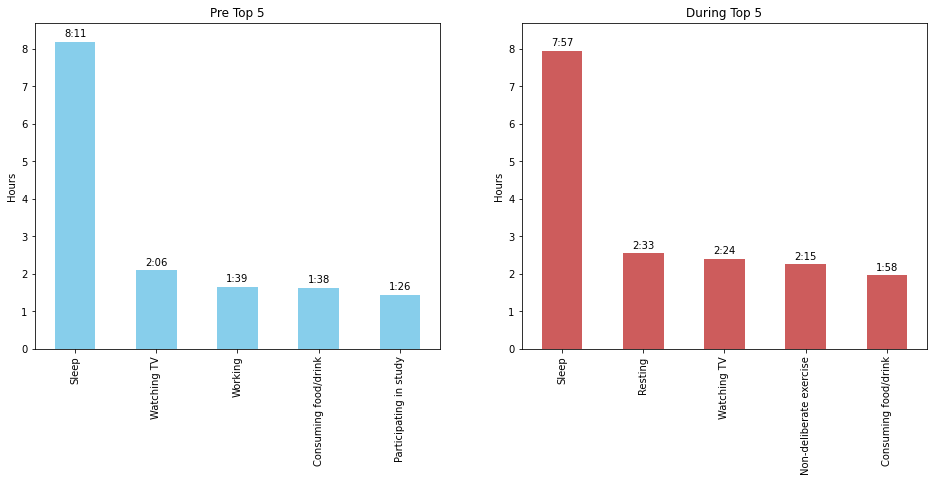

In [149]:
#Top 5 Overall
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
ax = pre_means[:5].plot(kind='bar', color = 'SkyBlue')
ax.set_ylabel('Hours')
ax.set_title('Pre Top 5')
autolabel(ax.patches)
plt.ylim(0, 8.7)

plt.subplot(1, 2, 2)
ax = dur_means[:5].plot(kind='bar', color = 'IndianRed')
ax.set_ylabel('Hours')
ax.set_title('During Top 5')
autolabel(ax.patches)
plt.ylim(0, 8.7)

Doesn't seem to be too different, perhaps patients are taking more naps during COVID-19. Also, working drops out of the top 5 during COVID-19 which is to be expected as less people overall are working. 

Let's look at which activities are most popular in the mornings, afternoons and evenings. 

(0.0, 1.5)

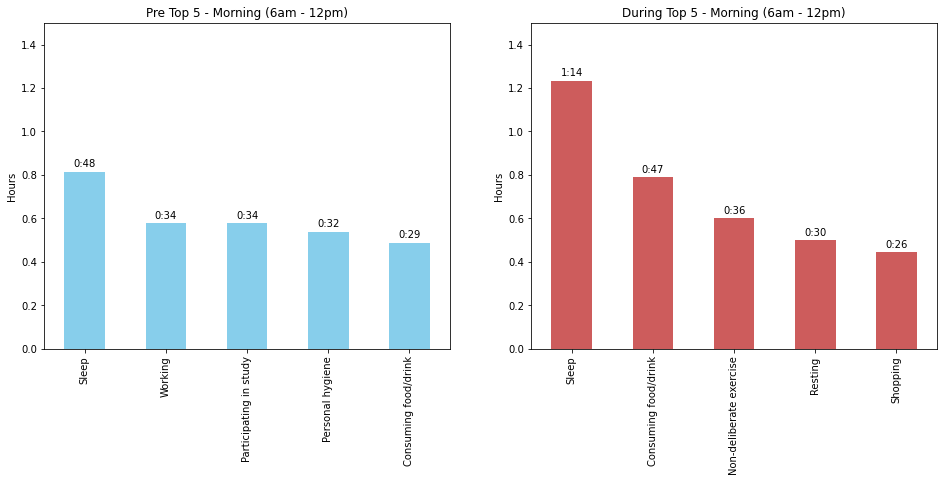

In [150]:
#Top 5 Mornings
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
ax = pre_means_morn[:5].plot(kind='bar', color = 'SkyBlue')
ax.set_ylabel('Hours')
ax.set_title('Pre Top 5 - Morning (6am - 12pm)')
autolabel(ax.patches)
plt.ylim(0, 1.5)

plt.subplot(1, 2, 2)
ax = dur_means_morn[:5].plot(kind='bar', color = 'IndianRed')
ax.set_ylabel('Hours')
ax.set_title('During Top 5 - Morning (6am - 12pm)')
autolabel(ax.patches)
plt.ylim(0, 1.5)

It seems that patients are sleeping in more in the mornings and having longer breakfasts... zzzzzzz

(0.0, 1.5)

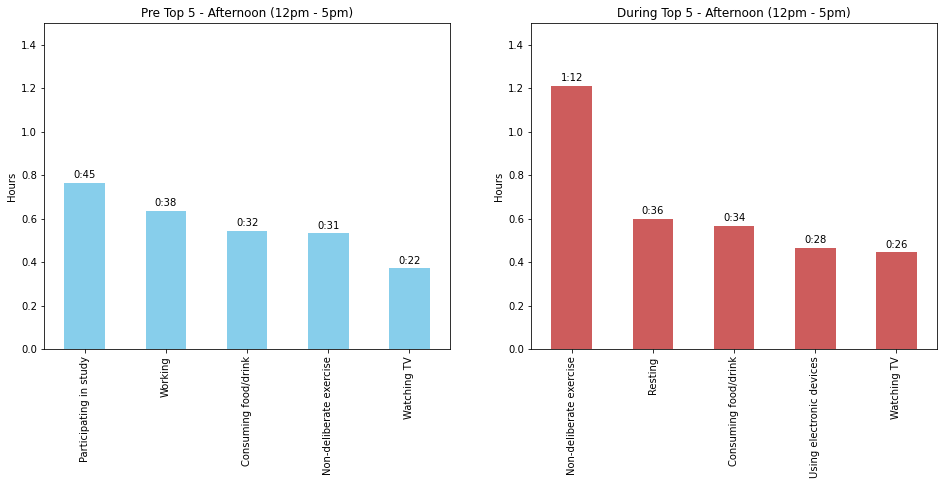

In [151]:
#Top 5 Afternoons
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
ax = pre_means_aft[:5].plot(kind='bar', color = 'SkyBlue')
ax.set_ylabel('Hours')
ax.set_title('Pre Top 5 - Afternoon (12pm - 5pm)')
autolabel(ax.patches)
plt.ylim(0, 1.5)

plt.subplot(1, 2, 2)
ax = dur_means_aft[:5].plot(kind='bar', color = 'IndianRed')
ax.set_ylabel('Hours')
ax.set_title('During Top 5 - Afternoon (12pm - 5pm)')
autolabel(ax.patches)
plt.ylim(0, 1.5)

Patients are loving the non-deliberate exercise! Lunchtime seems to stay the same whether in a pandemic or not. 

(0.0, 1.5)

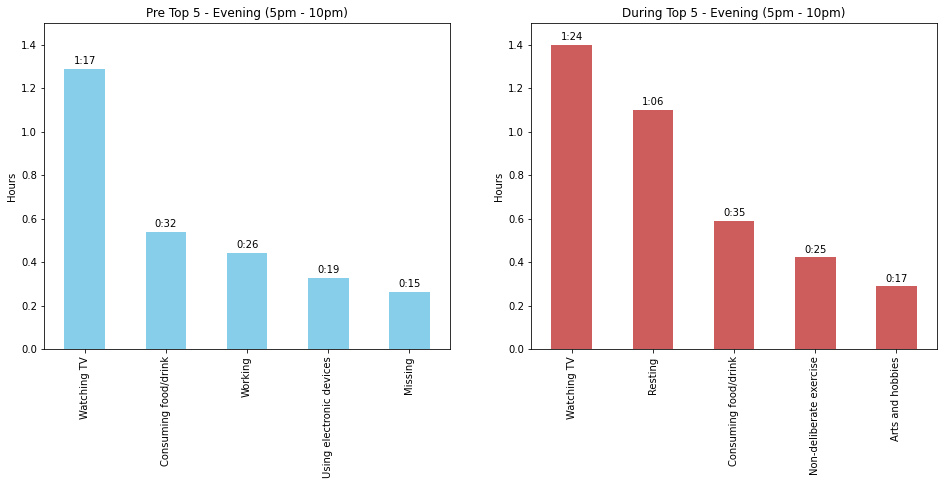

In [152]:
#Top 5 Evenings
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
ax = pre_means_eve[:5].plot(kind='bar', color = 'SkyBlue')
ax.set_ylabel('Hours')
ax.set_title('Pre Top 5 - Evening (5pm - 10pm)')
autolabel(ax.patches)
plt.ylim(0, 1.5)

plt.subplot(1, 2, 2)
ax = dur_means_eve[:5].plot(kind='bar', color = 'IndianRed')
ax.set_ylabel('Hours')
ax.set_title('During Top 5 - Evening (5pm - 10pm)')
autolabel(ax.patches)
plt.ylim(0, 1.5)

Patients enjoy to wind down with some good old TV. 

### Distributions of Interesting Activities

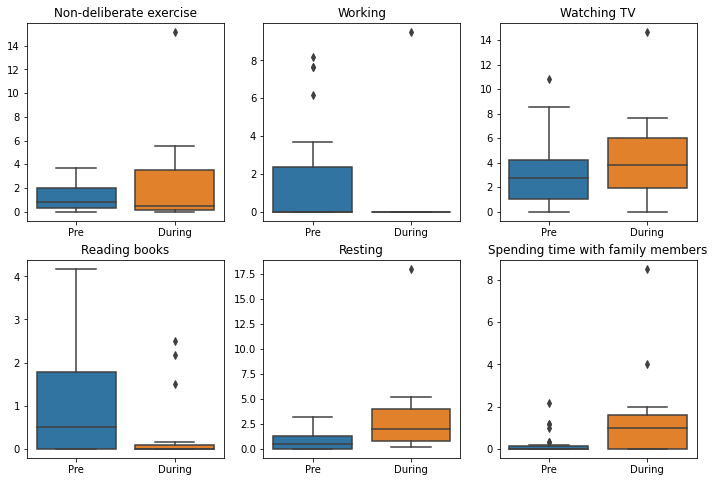

In [153]:
#Choose activities which seem interesting from previous bar charts
key = ['Non-deliberate exercise', 'Working', 'Watching TV', 'Reading books', 
       'Resting', 'Spending time with family members']

#Matrix of boxplots
plt.figure(figsize = (12, 8))
for i in range(0, len(key)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x = 'Period', y = df_total[key[i]], data = df_total)
    plt.title(key[i])
    plt.xlabel('')
    plt.ylabel('')

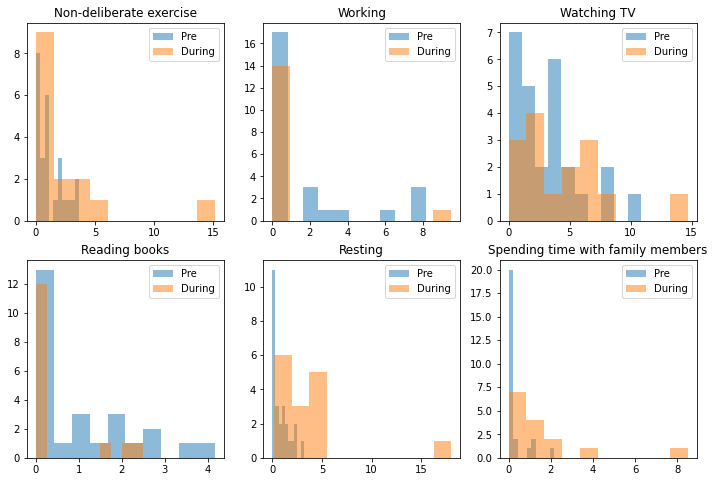

In [154]:
#Matrix of histograms
plt.figure(figsize=(12, 8))
for i in range(0, len(key)):
    plt.subplot(2, 3, i+1)
    plt.hist(pre_total[key[i]], alpha=0.5, label='Pre')
    plt.hist(dur_total[key[i]], alpha=0.5, label='During')
    plt.legend()
    plt.title(key[i])

Distributions do not look very nice. This is due to the small sample size of the data.

### Home/Not Home and Alone/Not Alone

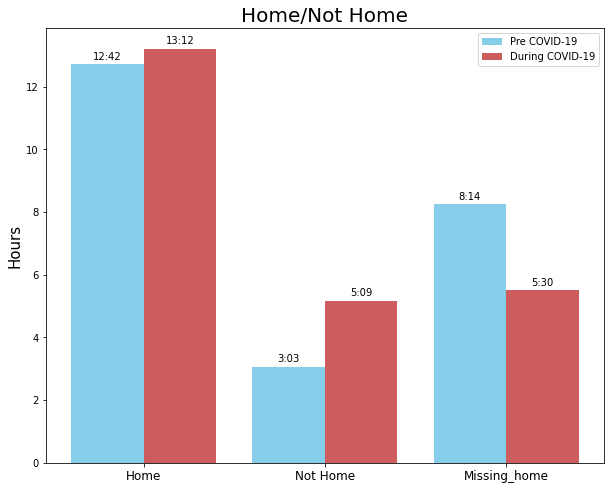

In [155]:
#Means of Home/Not Home
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

prehome = ax.bar(x, pre_home_alone.mean()[:3], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
durhome = ax.bar(x+bar_width, dur_home_alone.mean()[:3], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[1:], size=12)
ax.set_title('Home/Not Home', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

autolabel(prehome)
autolabel(durhome)

It is hard to say whether patients are at home more or less during COVID-19 because there is a bunch of missing data. 

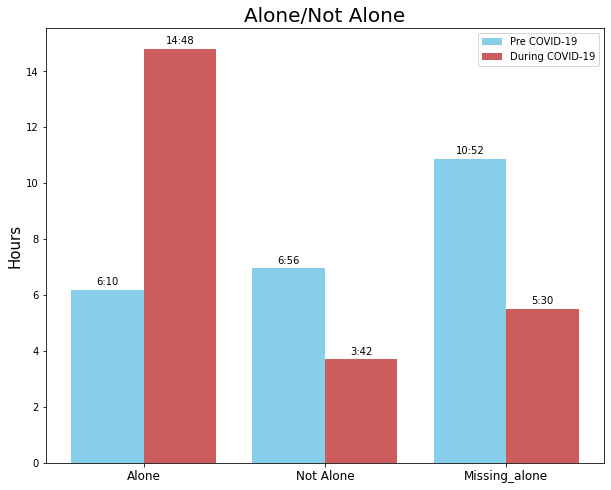

In [156]:
#Means of Alone/Not Alone
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

prealone = ax.bar(x, pre_home_alone.mean()[3:], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
duralone = ax.bar(x+bar_width, dur_home_alone.mean()[3:], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[4:], size=12)
ax.set_title('Alone/Not Alone', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

autolabel(prealone)
autolabel(duralone)

Patients seem to be alone a lot more of the time during COVID-19 which is to be expected. However, there is almost double the amount of data missing from the pre COVID-19 data than the during COVID-19 data which has most likely had a large impact on these results.

### Distributions of Home and Alone

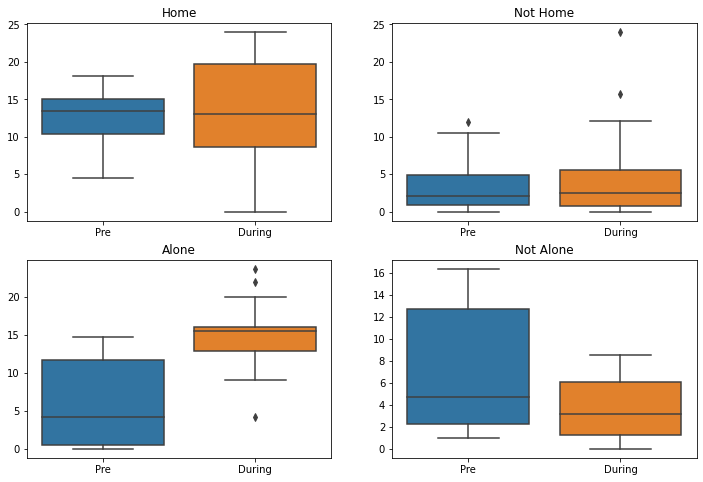

In [157]:
keys = ['Home', 'Not Home', 'Alone', 'Not Alone']

#Matrix of boxplots
plt.figure(figsize = (12, 8))
for i in range(0, len(keys)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = 'Period', y = df_home_alone[keys[i]], data = df_home_alone)
    plt.title(keys[i])
    plt.xlabel('')
    plt.ylabel('')

For the Home/Not Home data, the medians are pretty much equal. The variance in Not Home is equal as well, however the variance for Home during COVID-19 is much larger than pre COVID-19. 

For the Alone/Not Alone data, we can see that there is quite a large difference between the boxes in both plots. It is quite evident that patients are alone quite a lot more of the time during COVID-19 than before it, which makes sense.

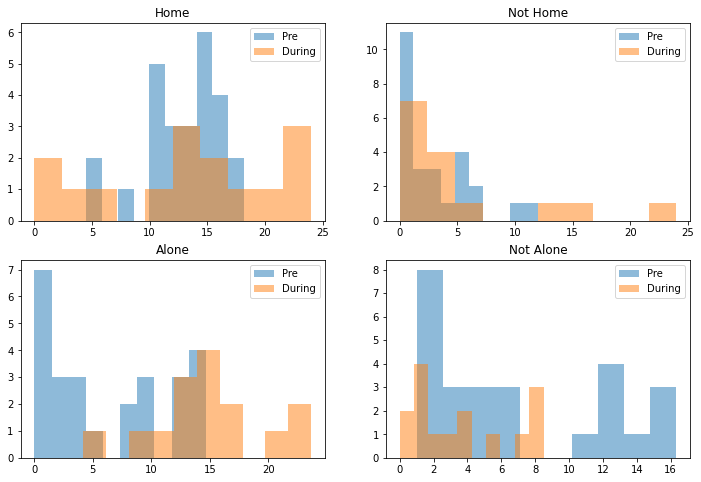

In [158]:
#Matrix of histograms
plt.figure(figsize=(12, 8))
for i in range(0, len(keys)):
    plt.subplot(2, 2, i+1)
    plt.hist(pre_home_alone[keys[i]], alpha=0.5, label='Pre')
    plt.hist(dur_home_alone[keys[i]], alpha=0.5, label='During')
    plt.legend()
    plt.title(keys[i])

Data is very obscure due to the small sample size, so statistical tests would be inappropriate. Transformation of the data may help.